# Diabetes Prediction
## What is Diabetes?
Diabetes is a chronic disease that occurs when the pancreas is no longer able to make insulin, or when the body cannot make good use of the insulin it produces. Learning how to use Machine Learning can help us predict Diabetes. Let’s get started!

## About this project :- 

- The objective of this project is to classify whether someone has diabetes or not.
- Dataset consists of several Medical Variables(Independent) and one Outcome Variable(Dependent)
- The independent variables in this data set are :-'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'
- The outcome variable value is either 1 or 0 indicating whether a person has diabetes(1) or not(0).

## About the Dataset

- Pregnancies :- Number of times a woman has been pregnant
- Glucose :- Plasma Glucose concentration of 2 hours in an oral glucose tolerance test
- BloodPressure :- Diastollic Blood Pressure (mm hg)
- SkinThickness :- Triceps skin fold thickness(mm)
- Insulin :- 2 hour serum insulin(mu U/ml)
- BMI :- Body Mass Index ((weight in kg/height in m)^2)
- Age :- Age(years)
- DiabetesPedigreeFunction :-scores likelihood of diabetes based on family history) 
- Outcome :- 0(doesn't have diabetes) or 1 (has diabetes)

# INDEX :- 
**1. Importing Required Libraries**

**2. Loading the Dataset**

**3. Exploratory Data Analysis**

a. Understanding the dataset
- Head of the dataset
- Shape of the data set
- Types of columns
- Information about data set
- Summary of the data set

b. Data Cleaning
- Dropping duplicate values
- Checking NULL values
- Checking for 0 value
         
**4. Data Visualization**
####  Here we are going to plot :-
 - Count Plot :- to see if the dataset is balanced or not
 - Histograms :- to see if data is normally distributed or skewed
 - Box Plot :- to analyse the distribution and see the outliers
 - Scatter plots :- to understand relationship between any two variables
 - Pair plot :- to create scatter plot between all the variables
 
**5. Feature Selection**

**6. Handling Outliers**

**7. Split the Data Frame into X and y**

**8. TRAIN TEST SPLIT**

**9. Build the Classification Algorithm**

9.1  KNN

9.2  Naive Bayes

9.3  SVM

9.4  Decision Tree

9.5  Random Forest

9.6  Logistic Regression

#### The models include the following:- 

  a. Hyper Parameter Tuning using GridSearch CV 
  
  b. Fit Best Model
  
  c. Predict on testing data using that model
  
  d. Performance Metrics :- Confusion Matrix, F1 Score, Precision Score, Recall Score
  

  
# If you like my work, feel free to upvote and comment !
### I'd love to hear your thoughts about this notebook! Constructive Criticism is always welcomed😄 Do share any better method, model or techniques I should try and improvements in this notebook(if any). This is my very first notebook and I hope you like my work ✨ Thankyou for your time🙏


# 1. Import Required Libraries

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
import warnings #avoid warning flash
warnings.filterwarnings('ignore')


# 2. Loading the dataset 

In [7]:
df=pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

# 3. Exploratory Data Analysis
## a. Understanding the dataset
- Head of the dataset
- Shape of the data set
- Types of columns
- Information about data set
- Summary of the data set

In [ ]:
df.head() #get familier with dataset, display the top 5 data records

In [9]:
df.shape #getting to know about rows and columns we're dealing with - 768 rows , 9 columns

(768, 9)

In [ ]:
df.columns #learning about the columns

In [ ]:
df.dtypes #knowledge of data type helps for computation

In [ ]:
df.info() #Print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [ ]:
df.describe() #helps us to understand how data has been spread across the table.
# count :- the number of NoN-empty rows in a feature.
# mean :- mean value of that feature.
# std :- Standard Deviation Value of that feature.
# min :- minimum value of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% are the percentile/quartile of each features. 

### **CONCLUSION** :- We observe that min value of some columns is 0 which cannot be possible medically.Hence in the data cleaning process we'll have to replace them with median/mean value depending on the distribution. Also in the max column we can see insulin levels as high as 846! We have to treat outliers.

## b. Data Cleaning
- Dropping duplicate values
- Checking NULL values
- Checking for 0 value and replacing it :- It isn't medically possible for some data record to have 0 value such as Blood Pressure or Glucose levels. Hence we replace them with the mean value of that particular column.

Read more about this here :- https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4

In [ ]:
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
df=df.drop_duplicates()

In [ ]:
#check for missing values, count them and print the sum for every column
df.isnull().sum() #conclusion :- there are no null values in this dataset

In [ ]:
#checking for 0 values in 5 columns , Age & DiabetesPedigreeFunction do not have have minimum 0 value so no need to replace , also no. of pregnancies as 0 is possible as observed in df.describe
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

### NOTE :-
Some of the columns have a skewed distribution, so the mean is more affected by outliers than the median. Glucose and Blood Pressure have normal distributions hence we replace 0 values in those columns by mean value. SkinThickness, Insulin,BMI have skewed distributions hence median is a better choice as it is less affected by outliers.

Refer Histograms down below to see the distribution.

Read more here :- 

https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

https://www.clinfo.eu/mean-median/



In [ ]:
#replacing 0 values with median of that column
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

# 4. Data Visualization
## Here we are going to plot :-
- Count Plot :- to see if the dataset is balanced or not
- Histograms :- to see if data is normally distributed or skewed
- Box Plot :- to analyse the distribution and see the outliers
- Scatter plots :- to understand relationship between any two variables
- Pair plot :- to create scatter plot between all the variables

In [ ]:
sns.countplot('Outcome',data=df)

### **Conclusion** :- We observe that number of people who do not have diabetes is far more than people who do which indicates that our data is imbalanced.

In [ ]:
#histogram for each  feature
df.hist(bins=10,figsize=(10,10))
plt.show()

### **Conclusion** :- We observe that only glucose and Blood Pressure are normally distributed rest others are skewed and have outliers

In [ ]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. Hence it is of utmost importance to deal with them. In this case removing outliers can cause data loss so we have to deal with it using various scaling and transformation techniques.

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20));
# we can come to various conclusion looking at these plots for example  if you observe 5th plot in pregnancies with insulin, you can conclude that women with higher number of pregnancies have lower insulin

# 5. Feature Selection

**Pearson's Correlation Coefficient** : Helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

In [ ]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

### **CONCLUSION** :- Observe the last row 'Outcome' and note its correlation scores with different features. We can observe that Glucose, BMI and Age are the most correlated with Outcome. BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated, hence they don't contribute much to the model so we can drop them. Read more about this here :- https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e I have used 3'rd technique method mentioned here.

In [ ]:
df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

# 6. Handling Outliers 

**1 — What is an Outlier?**

An outlier is a data point in a data set that is distant from all other observations.

**2 — How can we Identify an outlier?**

- Using Box plots

- Using Scatter plot

- Using Z score

I've used Box Plots above in data visualization step to detect outliers.

**3 — How am I treating the outliers ?**

Quantile Transformer :- This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme. 

Lets do a simple Standard Scaler vs Quantile Transformation. Given this data set:- 

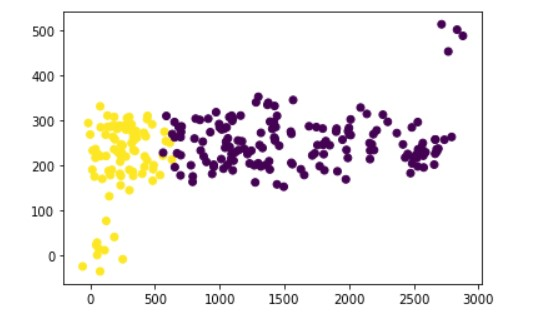

We perform StandardScaler() on this and get

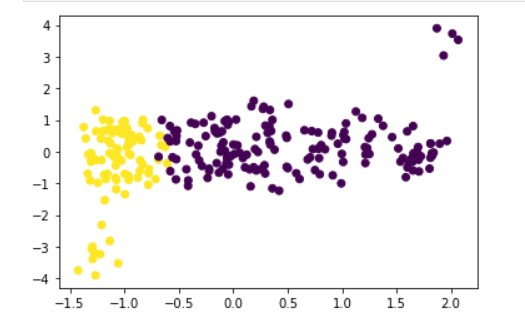

The Y-axis has 8 units whereas X-axis has only 3.5 units, indicating that Outliers have affected the scales

After applying Quantile Transformation , we get 

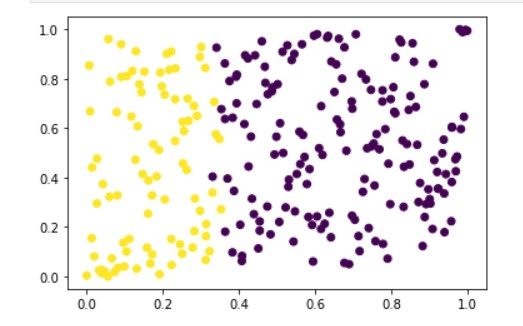

The Y-axis and X-axis are equally scaled. The outliers are still present in this dataset but their impact has been reduced. One of these examples has led me to use this transformer.

Courtesy :- Freecodecamp and CalmCode 

Learn more about it here :- https://www.youtube.com/watch?v=0B5eIE_1vpU , https://www.analyticsvidhya.com/blog/2021/05/feature-scaling-techniques-in-python-a-complete-guide/

In [ ]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()

In [ ]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['SkinThickness'],data=df_new)

# 5. Split the Data Frame into X and y

In [ ]:
target_name='Outcome'
y= df_new[target_name]#given predictions - training data 
X=df_new.drop(target_name,axis=1)#dropping the Outcome column and keeping all other columns as X

In [ ]:
X.head() # contains only independent features 

In [ ]:
y.head() #contains dependent feature

# 7. TRAIN TEST SPLIT

- The train-test split is a technique for evaluating the performance of a machine learning algorithm.

- Train Dataset: Used to fit the machine learning model.
- Test Dataset: Used to evaluate the fit machine learning model.

- Common split percentages include:

Train: 80%, Test: 20%

Train: 67%, Test: 33%

Train: 50%, Test: 50%

I've used 80% train and 20% test

Read more about it here :- https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)#splitting data in 80% train, 20%test

In [ ]:
X_train.shape,y_train.shape

In [ ]:
X_test.shape,y_test.shape

# 9. Classification Algorithms

- KNN
- Naive Bayes
- SVM
- Decision Tree
- Random Forest
- Logistic Regression

### The models include the following:-

#### a. Hyper Parameter Tuning using GridSearch CV

**1. What Is Hyperparameter Tuning?**

Hyperparameters are the variables that the user specify usually while building the Machine Learning model. thus, hyperparameters are specified before specifying the parameters or we can say that hyperparameters are used to evaluate optimal parameters of the model. the best part about hyperparameters is that their values are decided by the user who is building the model. For example, max_depth in Random Forest Algorithms, k in KNN Classifier.
Hyperparameter tuning is the process of tuning the parameters present as the tuples while we build machine learning models. 

**2. What is GridSearch ?**

Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters.

**3. What Steps To Follow For Hyper Parameter Tuning?**

1. Select the type of model we want to use like RandomForestClassifier, regressor or any other model
2. Check what are the parameters of the model
3. Select the methods for searching the hyperparameter
4. Select the cross-validation approach
5. Evaluate the model using the score

#### b. Fit Best Model

#### c. Predict on testing data using that model

#### d. Performance Metrics :- Confusion Matrix, F1 Score, Precision Score, Recall Score
**Confusion Matrix**
It is a tabular visualization of the model predictions versus the ground-truth labels. 

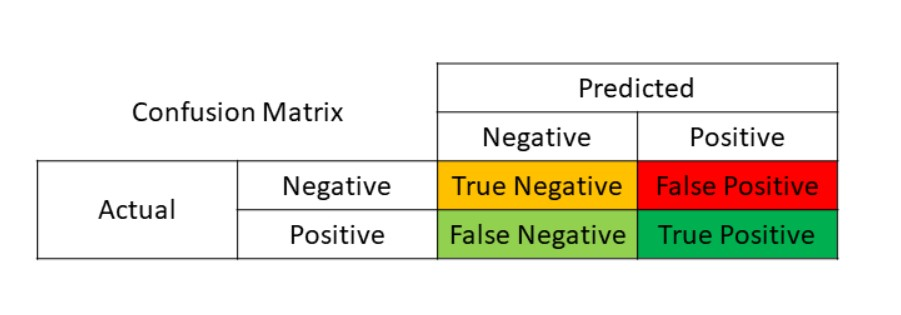

**F1 Score :-**
It’s the harmonic mean between precision and recall. 

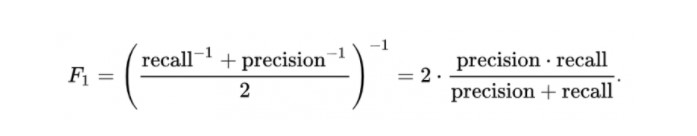

**Precision Score**
Precision is the fraction of predicted positives/negatives events that are actually positive/negatives.

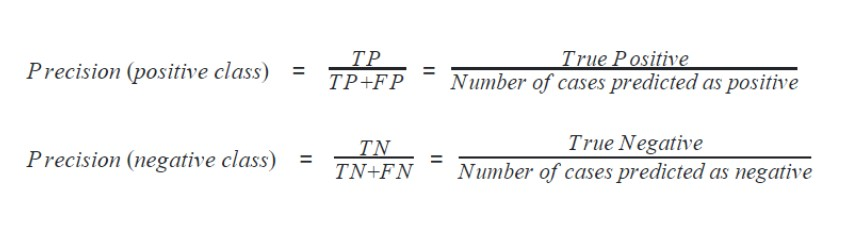


**Recall Score**
It is the fraction of positives/negative events that you predicted correctly. 

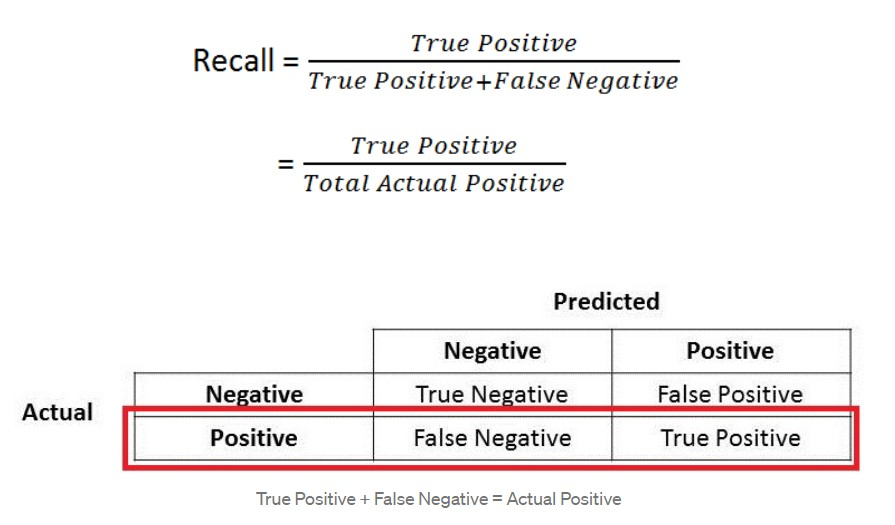

#### I've given preference to F1 Scoring because :- 

1. When you have a small positive class, then F1 score makes more sense.In this case the positive class number is almost half of the negative class.

2. F1-score is a better metric when there are imbalanced classes as in the above case.

3. F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall

Reference :- https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/



## 9.1 K Nearest Neighbours :-

KNN algorithm, is a non-parametric algorithm that classifies data points based on their proximity and association to other available data.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [ ]:
#List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [ ]:
best_model = grid_search.fit(X_train,y_train)

In [ ]:
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [ ]:
#Predict testing set
knn_pred = best_model.predict(X_test)

In [ ]:
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_pred))

## 9.2 Naive Bayes :-

Naive Bayes is classification approach that adopts the principle of class conditional independence from the Bayes Theorem. This means that the presence of one feature does not impact the presence of another in the probability of a given outcome, and each predictor has an equal effect on that result

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [ ]:
best_model= nbModel_grid.fit(X_train, y_train)

In [ ]:
nb_pred=best_model.predict(X_test)

In [ ]:
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n F1:\n",f1_score(y_test,nb_pred))
print("\n Precision score is:\n",precision_score(y_test,nb_pred))
print("\n Recall score is:\n",recall_score(y_test,nb_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred))

# 9.3 Support Vector Machine :- 

It is typically leveraged for classification problems, constructing a hyperplane where the distance between two classes of data points is at its maximum. This hyperplane is known as the decision boundary, separating the classes of data points (e.g., has diabetes vs doesn't have diabetes ) on either side of the plane.

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

In [ ]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [ ]:
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [ ]:
grid_result = grid_search.fit(X, y)

In [ ]:
svm_pred=grid_result.predict(X_test)

In [ ]:
print("Classification Report is:\n",classification_report(y_test,svm_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,svm_pred))

## 9.4 Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

In [ ]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
best_model=grid_search.fit(X_train, y_train)

In [ ]:
dt_pred=best_model.predict(X_test)

In [ ]:
print("Classification Report is:\n",classification_report(y_test,dt_pred))
print("\n F1:\n",f1_score(y_test,dt_pred))
print("\n Precision score is:\n",precision_score(y_test,dt_pred))
print("\n Recall score is:\n",recall_score(y_test,dt_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,dt_pred))

## 9.5 Random Forest :- 
The "forest" references a collection of uncorrelated decision trees, which are then merged together to reduce variance and create more accurate data predictions.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [1800]
max_features = ['sqrt', 'log2']

In [ ]:
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [ ]:
best_model = grid_search.fit(X_train, y_train)

In [ ]:
rf_pred=best_model.predict(X_test)

In [ ]:
print("Classification Report is:\n",classification_report(y_test,rf_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,rf_pred))

## 9.6 Logistic Regression:- 
Logistical regression is selected when the dependent variable is categorical, meaning they have binary outputs, such as "true" and "false" or "yes" and "no." 

Logistic regression does not really have any critical hyperparameters to tune. Sometimes, you can see useful differences in performance or convergence with different solvers (solver).Regularization (penalty) can sometimes be helpful.

After trying to tune this for 4 hours and achieving 0.00003% of increased accuracy, I've given up and didn't apply grid search for Logistic regression. If you have any better method please comment and help me!🥲

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [ ]:
reg = LogisticRegression()
reg.fit(X_train,y_train)                         

In [ ]:
lr_pred=reg.predict(X_test)

In [ ]:
print("Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n F1:\n",f1_score(y_test,lr_pred))
print("\n Precision score is:\n",precision_score(y_test,lr_pred))
print("\n Recall score is:\n",recall_score(y_test,lr_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,lr_pred))